* PCA(Principal Component Analysis) for Unsupervised data Compression
* LDA (Linear discriminant Analysis) for supervised dimensonality reduction

## Extracting PCA step by step
1. Standarizing the data
2. Constructing the covarience matrix
3. Obtaining the eigen values and eigen vectors
4. Sorting the eigenvalues by decreasing order to rank the eigenvectors.

In [1]:
# import pandas as pd
# df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
# # df_wine.to_csv('Wine_dataset.csv')

In [2]:
import pandas as pd
df_wine = pd.read_csv("Wine_dataset.csv")
df_wine.head()

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [3]:
print(df_wine.shape)

(177, 14)


In [4]:
print(df_wine.columns)

Index(['1', '14.23', '1.71', '2.43', '15.6', '127', '2.8', '3.06', '.28',
       '2.29', '5.64', '1.04', '3.92', '1065'],
      dtype='object')


In [5]:
## Preprocessing of dataset
from sklearn.model_selection import train_test_split
X, y = df_wine.iloc[:,1:].values, df_wine.iloc[:,0].values


In [7]:
# Classes
import numpy as np
print(np.unique(y))

[1 2 3]


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, stratify=y,random_state=0)

In [9]:
# Standarize the Features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

In [10]:
X_train_std.shape

(123, 13)

# Constructing Covarience matrix

In [11]:
import numpy as np
cov_mat = np.cov(X_train_std.T)
cov_mat

array([[ 1.00819672,  0.08110102,  0.18852898, -0.35369039,  0.24381376,
         0.26763138,  0.17967185, -0.08636527,  0.0482326 ,  0.56500893,
         0.00958933, -0.03401656,  0.64929621],
       [ 0.08110102,  1.00819672,  0.10975803,  0.29047848, -0.07541234,
        -0.32037575, -0.39698304,  0.31836703, -0.19529013,  0.16812949,
        -0.54636025, -0.38865331, -0.24505469],
       [ 0.18852898,  0.10975803,  1.00819672,  0.41759721,  0.25711659,
         0.15331893,  0.12547461,  0.15413905, -0.04283556,  0.23948347,
        -0.01955895, -0.00569682,  0.21533057],
       [-0.35369039,  0.29047848,  0.41759721,  1.00819672, -0.18262105,
        -0.33748501, -0.35474679,  0.39748523, -0.23558146, -0.06253006,
        -0.28229948, -0.24658967, -0.53193867],
       [ 0.24381376, -0.07541234,  0.25711659, -0.18262105,  1.00819672,
         0.20603669,  0.1743739 , -0.23529039,  0.17900904,  0.24764492,
         0.07611849, -0.02894926,  0.41302773],
       [ 0.26763138, -0.320375

## Eigen Decomposition
Eigenvectors of the covarience matrix represents the principlr components whereas the corresponding eigenvalues will define their magnitude.
Eigenvector v satisfies the following condition:
$ \sum v = \lambda v  $

here $\sum $ is the covarience matrix, not the summation

In [12]:
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print(f"{eigen_vals = }\n")
print(f"{eigen_vecs = }")

eigen_vals = array([4.79500219, 2.50003078, 1.44306678, 0.99901271, 0.87517717,
       0.67821564, 0.53031813, 0.35080209, 0.28446498, 0.11333093,
       0.14810971, 0.18968162, 0.19934466])

eigen_vecs = array([[ 0.12221148, -0.49927666,  0.12829383,  0.01136017,  0.35962533,
        -0.23048312, -0.04714035,  0.39450917, -0.37873538,  0.10409129,
        -0.07349869,  0.45755259, -0.09926907],
       [-0.24391049, -0.15419073, -0.1337824 , -0.54699739,  0.01698596,
        -0.60977103,  0.35388209,  0.03230253,  0.07247366, -0.03035566,
         0.05093259, -0.29983979, -0.05071359],
       [ 0.00369454, -0.25170137, -0.68792836,  0.23900517,  0.05336737,
        -0.09514094, -0.13810458, -0.11452347,  0.42213357, -0.08005053,
        -0.03823149,  0.18581102, -0.37627553],
       [-0.249647  ,  0.12269609, -0.59377246, -0.00821015, -0.0239095 ,
         0.08118367, -0.20497479,  0.38757845, -0.33788462,  0.0565922 ,
        -0.06769449, -0.12717355,  0.48215182],
       [ 0.13011026

In [13]:
print(len(eigen_vals))
print(eigen_vals.shape)
print(len(eigen_vecs))
print(eigen_vecs.shape)


13
(13,)
13
(13, 13)


# Calculating Total and Explained varience
* total_varience = sum(eigen_values)\
* explained_varience = top k eigen_values\
* explained_varience_ratio = $\frac{\lambda_j}{\sum^d_{j=1} \lambda_j}$

In [14]:
tot = sum(eigen_vals)
var_exp = [(i/tot) for i in sorted(eigen_vals, reverse=True)] 
cum_var_exp = np.cumsum(var_exp)

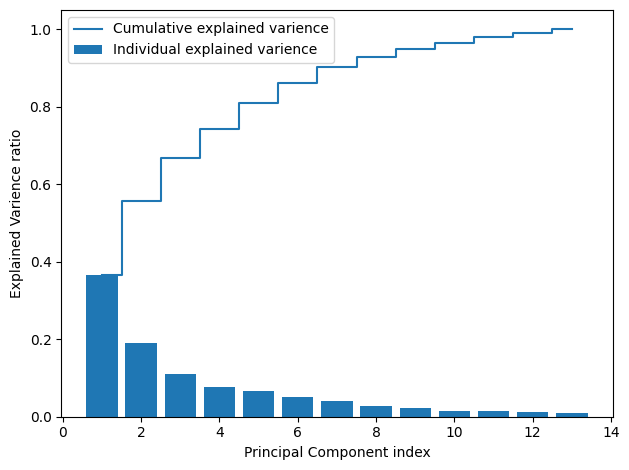

In [15]:
# Visualization
import matplotlib.pyplot as plt
plt.bar(range(1,14), var_exp, align='center', label='Individual explained varience')
plt.step(range(1,14), cum_var_exp, where='mid', label='Cumulative explained varience')
plt.xlabel("Principal Component index")
plt.ylabel("Explained Varience ratio")
plt.legend(loc="best")
plt.tight_layout()
plt.show()

# Feature Transformation
After the decomposition of covarience matrix into eigenpairs, The Feature transformation of dataset into the new principal component axes by follwing the steps:
1. Select k eigen_vectors which corresponds to the k largest eigenvalues, where k is the dimensionality of the new feature subspace(k<=d)
2. Construct a projection matrix, W, from the "top" k eigenvectors.
3. Transform the d-dimensional input dataset, X, using the projection matrix, W, to obtain the new K-dimensional subspace.

In [16]:
# make a list of (eigenvalue, eigenvector) tuples.
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]
eigen_pairs

[(4.7950021867965695,
  array([ 0.12221148, -0.24391049,  0.00369454, -0.249647  ,  0.13011026,
          0.39099441,  0.41649235, -0.31569983,  0.2982478 , -0.07304049,
          0.31641846,  0.37253046,  0.29514562])),
 (2.500030784676868,
  array([-0.49927666, -0.15419073, -0.25170137,  0.12269609, -0.31420427,
         -0.05595656,  0.02637354, -0.07362469,  0.01094724, -0.53961007,
          0.21061646,  0.23649287, -0.38598117])),
 (1.4430667761042502,
  array([ 0.12829383, -0.1337824 , -0.68792836, -0.59377246, -0.08497154,
         -0.19268611, -0.17557319, -0.14144693, -0.10831831,  0.04566347,
         -0.03375899, -0.15215839,  0.08087437])),
 (0.9990127053029306,
  array([ 0.01136017, -0.54699739,  0.23900517, -0.00821015,  0.2395333 ,
         -0.19038516, -0.12710511,  0.14397781, -0.50797474, -0.12906415,
          0.4398643 , -0.11987325,  0.17441276])),
 (0.8751771700921368,
  array([ 0.35962533,  0.01698596,  0.05336737, -0.0239095 , -0.78023056,
          0.14478068,

In [17]:
# Sort the (eigenvals, eigen_vecs) tuples from high to low
eigen_pairs.sort(key=lambda k: k[0], reverse=True)
eigen_pairs

[(4.7950021867965695,
  array([ 0.12221148, -0.24391049,  0.00369454, -0.249647  ,  0.13011026,
          0.39099441,  0.41649235, -0.31569983,  0.2982478 , -0.07304049,
          0.31641846,  0.37253046,  0.29514562])),
 (2.500030784676868,
  array([-0.49927666, -0.15419073, -0.25170137,  0.12269609, -0.31420427,
         -0.05595656,  0.02637354, -0.07362469,  0.01094724, -0.53961007,
          0.21061646,  0.23649287, -0.38598117])),
 (1.4430667761042502,
  array([ 0.12829383, -0.1337824 , -0.68792836, -0.59377246, -0.08497154,
         -0.19268611, -0.17557319, -0.14144693, -0.10831831,  0.04566347,
         -0.03375899, -0.15215839,  0.08087437])),
 (0.9990127053029306,
  array([ 0.01136017, -0.54699739,  0.23900517, -0.00821015,  0.2395333 ,
         -0.19038516, -0.12710511,  0.14397781, -0.50797474, -0.12906415,
          0.4398643 , -0.11987325,  0.17441276])),
 (0.8751771700921368,
  array([ 0.35962533,  0.01698596,  0.05336737, -0.0239095 , -0.78023056,
          0.14478068,

In [18]:
# Constructing the projection matrix , taking top 2 eigenvectors i.e k = 2. 
w = np.hstack((eigen_pairs[0][1][:, np.newaxis],eigen_pairs[1][1][:, np.newaxis]))
print("Matrix W: \n", w)
print(w.shape)

Matrix W: 
 [[ 0.12221148 -0.49927666]
 [-0.24391049 -0.15419073]
 [ 0.00369454 -0.25170137]
 [-0.249647    0.12269609]
 [ 0.13011026 -0.31420427]
 [ 0.39099441 -0.05595656]
 [ 0.41649235  0.02637354]
 [-0.31569983 -0.07362469]
 [ 0.2982478   0.01094724]
 [-0.07304049 -0.53961007]
 [ 0.31641846  0.21061646]
 [ 0.37253046  0.23649287]
 [ 0.29514562 -0.38598117]]
(13, 2)


We can now transform an example, x(represented as a 13D row vector), onto the PCA subspace(the principal components one and two) obtaining x', now a 2d example vector consisting of two new features:
x' = xw

In [19]:
X_train_std[0].dot(w)

array([-3.60252556, -1.65534122])

In [20]:
# Similarly we can transform the entire training dataset onto two principal components 
# by calculating the matrix dot product. X' = XW
print(X_train_std.shape)
X_train_pca = X_train_std.dot(w)

(123, 13)


In [21]:
X_train_pca.shape
X_train_pca

array([[-3.60252556, -1.65534122],
       [ 1.95604795, -1.82561351],
       [ 2.53103837, -1.06863621],
       [ 1.47797293, -0.71793527],
       [-3.90146552, -0.40145293],
       [-0.42214163,  2.44532507],
       [-1.74387502,  1.45385432],
       [-3.13944101,  0.16581341],
       [-1.15074122,  1.19597359],
       [-1.94561601,  1.43399254],
       [-0.45636798,  2.08549274],
       [ 3.14573128, -1.07215686],
       [ 1.31382487,  0.37036872],
       [-1.11804307, -3.24657234],
       [ 2.29628822, -1.98343198],
       [-2.95314851, -0.44212808],
       [-0.69582743,  1.17779918],
       [ 1.67836268, -0.21219913],
       [-2.49714184, -1.93398917],
       [-2.45493213, -2.22976937],
       [ 1.63238674,  1.72307205],
       [ 2.19524397, -0.77156229],
       [ 1.50108493,  2.20988936],
       [ 0.88556019,  1.86713781],
       [-2.87493498, -1.84457834],
       [ 1.12582905,  1.47898139],
       [-2.91083021, -0.20971598],
       [ 2.55194101, -1.14186067],
       [ 0.80245105,

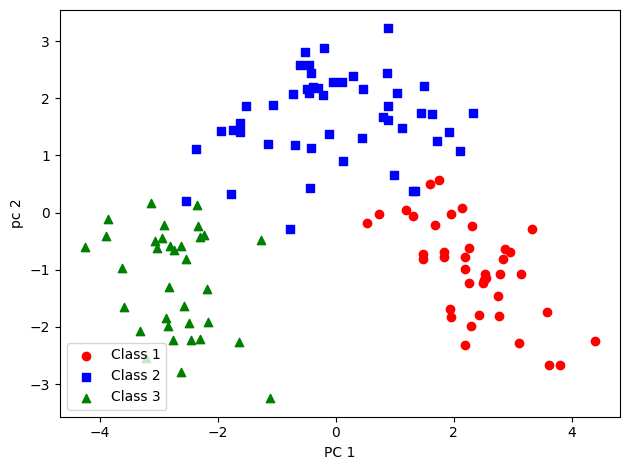

In [22]:
# Visualizing the transformed Wine dataset into 2d scatterplot
colors = ['r','b', 'g']
markers =['o','s','^']
for l,c,m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train==l, 0],
                X_train_pca[y_train==l,1],
                c=c, label=f'Class {l}', marker=m)
plt.xlabel('PC 1')
plt.ylabel('pc 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

In [23]:
np.unique(y_train)

array([1, 2, 3])

In [25]:
## Assessing feature contributions
loadings = eigen_vecs * np.sqrt(eigen_vals)
loadings

array([[ 0.2676125 , -0.78943057,  0.15411644,  0.01135457,  0.33643275,
        -0.18981172, -0.03432899,  0.23366206, -0.2019995 ,  0.03504198,
        -0.02828599,  0.19927538, -0.04432168],
       [-0.53410283, -0.24379846, -0.16070974, -0.5467273 ,  0.01589052,
        -0.50216991,  0.25770736,  0.01913232,  0.03865401, -0.01021913,
         0.01960142, -0.13058759, -0.02264262],
       [ 0.00809011, -0.39797726, -0.82639262,  0.23888715,  0.04992565,
        -0.07835223, -0.10057182, -0.06783059,  0.22514603, -0.02694874,
        -0.0147134 ,  0.08092526, -0.16799961],
       [-0.54666436,  0.19400075, -0.71328529, -0.0082061 , -0.02236755,
         0.06685788, -0.14926867,  0.22955709, -0.18021163,  0.01905157,
        -0.02605224, -0.0553872 ,  0.21527129],
       [ 0.28490885, -0.49680364, -0.10207437,  0.23941502, -0.72991275,
        -0.07805679,  0.20578697, -0.04432831, -0.15724988,  0.01761078,
         0.05518718,  0.03189369,  0.0138501 ],
       [ 0.85617975, -0.088475

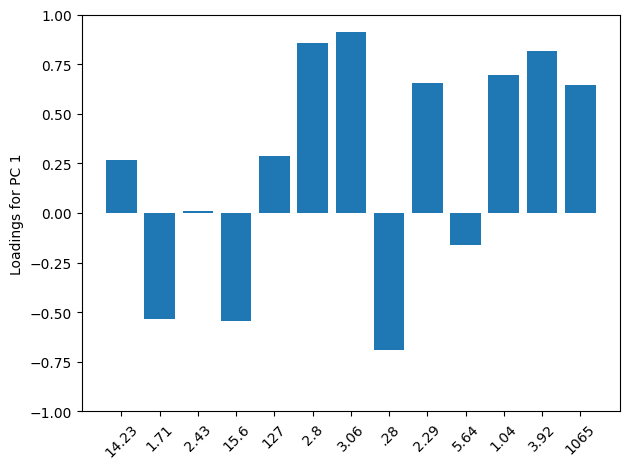

In [26]:
# Plotting the loadings for the first principal component, loadings[:,0]
fig, ax = plt.subplots()
ax.bar(range(13), loadings[:,0], align='center')
ax.set_ylabel("Loadings for PC 1")
ax.set_xticks(range(13))
ax.set_xticklabels(df_wine.columns[1:], rotation = 45)
plt.ylim([-1,1])
plt.tight_layout()
plt.show()